In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split


In [ ]:
#reading the data from the csv file
df = pd.read_csv('10YearPeriodHIV-describe.csv')
df.info()
def estimate_coef(x, y):
	# number of observations/points
	n = np.size(x)

	# mean of x and y vector
	m_x = np.mean(x)
	m_y = np.mean(y)

	# calculating cross-deviation and deviation about x
	SS_xy = np.sum(y*x) - n*m_y*m_x
	SS_xx = np.sum(x*x) - n*m_x*m_x

	# calculating regression coefficients
	b_1 = SS_xy / SS_xx
	b_0 = m_y - b_1*m_x

	return (b_0, b_1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Period              11 non-null     int64  
 1   ART_mean            11 non-null     float64
 2   Death_mean          11 non-null     float64
 3   HIVpopulation_mean  11 non-null     float64
 4   Population_mean     11 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 568.0 bytes


In [ ]:
X = df['Period']
y = df['Death_mean']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=42) # Split data into training and testing sets.

#Linear
n = X_train.shape[0]
A = np.ones((n,2))
A[:,1] = X_train
c = np.linalg.lstsq(A,y_train,rcond=-1)[0]
print(f"Gradient: {c[1]}, y-intercept: {c[0]}")
y_linear = c[1] * X + c[0]

Gradient: -232.1116666541116, y-intercept: 471789.27497474366


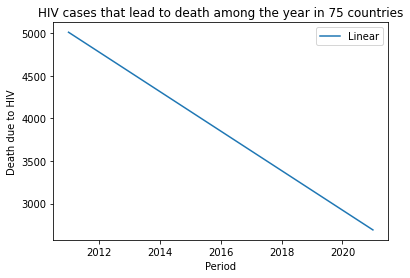

In [ ]:
#Plotting Fits
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(X,y_linear,'-',label="Linear")
plt.xlabel("Period")
plt.ylabel("Death due to HIV")
plt.title("HIV cases that lead to death among the year in 75 countries")
ax.legend()

In [ ]:
# Testing

y_linear = c[1] * X_test + c[0]
print(r2_score(y_test,y_linear)) # model has a positive r2 score. The model has succeeded.

0.9705169242581679


   Period        Death
0    2021  2691.596667
1    2022  2459.485000
2    2023  2227.373333
3    2024  1995.261667
4    2025  1763.150000


Text(0.5, 1.0, 'HIV cases that lead to death in 5 years among 75 countries')

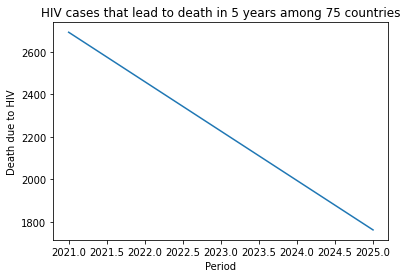

In [ ]:
# Predictions
X_max = 2021

X_predict = np.arange(X_max, X_max+5,1) 
# Predicting HIV increase in the next 5 years

y_predict = c[1] * X_predict + c[0]
df_predict = pd.DataFrame(data={'Period': X_predict, 'Death':y_predict})



print(df_predict)

# Plotting results of regression
plt.plot(X_predict,y_predict,'-')
plt.xlabel("Period")
plt.ylabel("Death due to HIV")
plt.title("HIV cases that lead to death in 5 years among 75 countries")
